# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

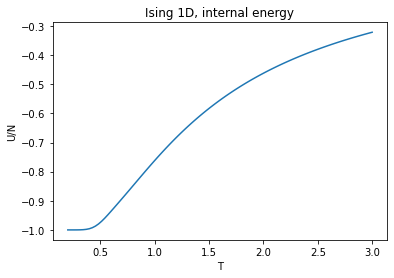

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

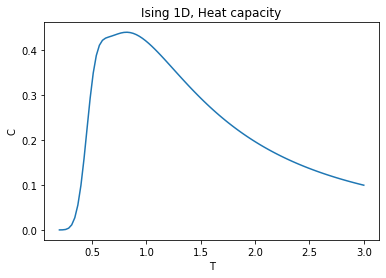

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

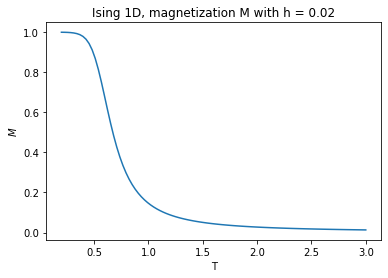

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

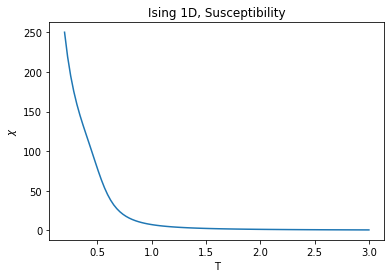

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

---

### Compatibilità fra la Meccanica Statistica e gli algoritmi di Metropolis e di Gibbs

In questo caso l'algoritmo di Metropolis (così come l'algoritmo di Gibbs) può servire per paragonare alcune osservabili con i loro valori teorici in funzione della temperatura $T$, in particolate per le temperature comprese nell'intervallo $T\in [0.5,2]$.

Prima di chiedersi come è possibile effettuare tale confronto, è importante chiedersi come si può simulare l'evoluzione termodinamica un ensemble microcanonico a temperatura $T$, in questo caso determinato da un sistema monodimensionale di $N=50$ spin che possono assumere i valori discreti $\{-1,1\}$ attraverso gli algoritmi di Metropolis e di Gibbs.

Per fare ciò è necessario partire da una configurazione di partenza: è possibile scegliere una configurazione di spin totalmente ordinata o totalmente disordinata, ovvero un sistema rispettivamente a temperatura $T=0$ o un sistema a temperatura $T=\infty$. In questo caso si sceglie una configurazione totalmente disordinata, scegliendo gli spin in modo casuale. Dopodichè, si può utilizzare l'algoritmo di Metropolis o di Gibbs per far evolvere il sistema nel seguente modo:

1. Si considera il sistema avente la temperatura $T$ e con configurazione iniziale $\mu$;
2. Si sceglie la probabilità di transizione $T(\nu|\mu)$ con la quale può essere "girato" un solo spin alla volta, scelto in modo casuale;
3. Viene determinata la probabilità di accettazione della mossa proposta del punto precedente secondo $A(\nu|\mu)$.

se si utilizza l'algoritmo di Metropolis, si sceglie $T(\nu|\mu)$ uniforme e quindi simmetrica. In questo modo la probabilità di accettazione non dipende da $T(\nu|\mu)$ e si riduce a:

$$A(\nu|\mu)=\min\bigg[1,\frac{p(\nu)}{p(\mu)}\bigg]=\min\big[1,e^{-\beta(E_{\nu} - E_{\mu})}\big]\,\,,$$

quindi se $\Delta E = E_{\nu} - E_{\mu}<0$ allora $A(\nu|\mu)=1$, la mossa viene accettata e quindi lo spin viene girato, mentre se $\Delta E =E_{\nu} - E_{\mu}>0$ allora si gira il singolo spin solo con probabilità $A(\nu|\mu)=e^{-\beta(E_{\nu} - E_{\mu})}$, e la variazione di energia si calcola come

$$\Delta E = \big(-J\tilde{s}_i(s_{i+1}+s_{i-1})-h\tilde{s}_i\big) - \big(-Js_i(s_{i+1}+s_{i-1})-hs_i\big)\,\,,$$

dove $\tilde{s}_i$ è lo $i$-esimo spin (scelto casualmente) girato, per cui $\tilde{s}_i=-s_i$.

Se per il campionamento invece si utilizza l'algoritmo di Gibbs, la mossa proposta è sempre accettata. La probabilità di avere $\tilde{s}_i$ nella nuova configurazione $\nu$, partendo dalla configurazione $\nu$ è:
$$p\big(\tilde{s}_i=\pm1\,|\,s_i\big)=\frac{1}{1+\exp{\big[\mp2\beta\big(J(s_{i-1}+s_{i+1})+h\big)}\big]}$$

Notiamo che in entrambi i casi, nel caso di un sistema monodimensionale, le probabilità vengono completamente determinate dal valore dello spin delle particelle prime vicine $i-1$ e $i+1$.

In entrambi i casi si itera il procedimento per un certo numero di step $n$, calcolando così le medie e le deviazioni standard progressive delle osservabili che si vuole calcolare per una data temperatura $T$.

Essendo che è stata scelta una configurazione iniziale di spin completamente disordinata, ma si vogliono calcolare delle osservabili del sistema a temperatura finita, si deduce che serviranno un determinato numero di step $n_{eq}$ di equilibrazione per portare il sistema di $N=50$ spin all'equilibrio.

Si analizzano dunque le fluttuazioni dell'energia interna del sistema $U(N=50, T)$ per $T=0.5,1,2$, per un numero di step di equilibrazione pari a $n_{eq}=300$, in modo da determinare quale potrebbe essere una buona strategia per eseguire l'equilibrazione, e calcolare le osservabili in funzione della temperatura.

Si calcola dunque il contributo di singola particella all'energia interna istantanea del sistema per ogni step dell'algoritmo in questione con l'ausilio dell'hamiltoniana (con $h=0$)

$$H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})\,\,,$$

per cui si ha che

$$\frac{U(N,T)}{N}=\frac{\langle H\rangle_{h=0}}{N}\,\,,$$

e si confrontano i risultati di questo calcolo con l'energia interna per particella calcolata attraverso la funzione di partizione del sistema

$$\frac{U(N,T)}{N} = -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}\underset{h=0}= 
-J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)\,\,.$$

Di seguito si hanno i grafici dei valori istantanei dell'energia interna del sistema confrontati con i valori attesi, determinati dall'equazione precedente, per le temperature $T=0.5, 1, 2$, utilizzando l'algoritmo di Metropolis e l'algoritmo di Gibbs.

In [5]:
data_eq_m_5 = np.loadtxt('Ising_equilibration/ene_eq_metro_5.dat')
data_eq_m_10 = np.loadtxt('Ising_equilibration/ene_eq_metro_10.dat')
data_eq_m_20 = np.loadtxt('Ising_equilibration/ene_eq_metro_20.dat')
data_eq_g_5 = np.loadtxt('Ising_equilibration/ene_eq_gibbs_5.dat')
data_eq_g_10 = np.loadtxt('Ising_equilibration/ene_eq_gibbs_10.dat')
data_eq_g_20 = np.loadtxt('Ising_equilibration/ene_eq_gibbs_20.dat')

x = data_eq_m_5[:, 0]
u_m_5 = data_eq_m_5[:, 1]
u_m_10 = data_eq_m_10[:, 1]
u_m_20 = data_eq_m_20[:, 1]
u_g_5 = data_eq_g_5[:, 1]
u_g_10 = data_eq_g_10[:, 1]
u_g_20 = data_eq_g_20[:, 1]


# Calcolo i valori attesi dell'energia interna per particella
J = 1.0
Ns = 50

T = 0.5
th = np.tanh(J/T)
ch = 1/th
u_5 = -J*( th + ch*(th**Ns) )/( 1 + th**Ns )

T = 1
th = np.tanh(J/T)
ch = 1/th
u_10 = -J*( th + ch*(th**Ns) )/( 1 + th**Ns )

T = 2
th = np.tanh(J/T)
ch = 1/th
u_20 = -J*( th + ch*(th**Ns) )/( 1 + th**Ns )

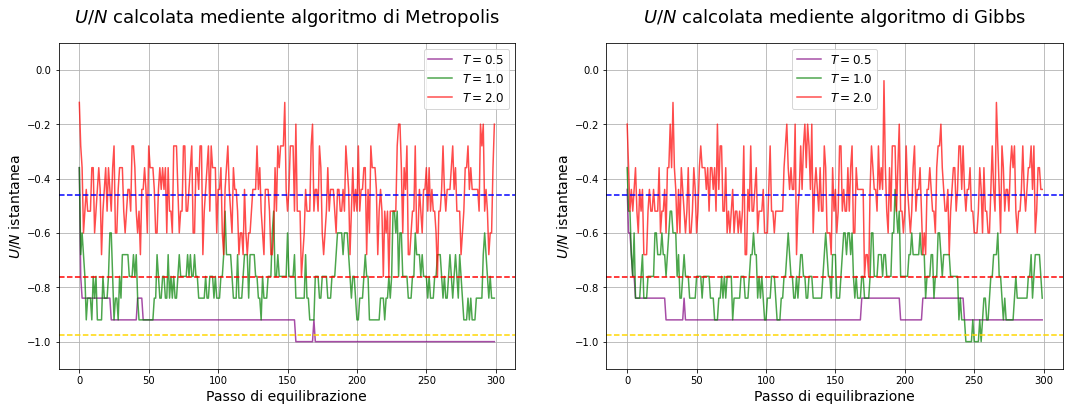

In [6]:
plt.figure(figsize=(18,6))

# plt.suptitle("Fase di equilibrazione",fontsize=18)

# Grafico 1
plt.subplot(1,2,1)
plt.title("$U/N$ calcolata mediente algoritmo di Metropolis",fontsize=18,pad=20)
plt.plot(x, u_m_5, color='purple', label='$T=0.5$', alpha=0.7)
plt.plot(x, u_m_10, color='green', label='$T=1.0$', alpha=0.7)
plt.plot(x, u_m_20, color='red', label='$T=2.0$', alpha=0.7)
plt.axhline(y=u_5, color='gold', linestyle='--')  # label='Valore atteso di $U/N$'
plt.axhline(y=u_10, color='red', linestyle='--')
plt.axhline(y=u_20, color='blue', linestyle='--')
plt.ylabel('$U/N$ istantanea',fontsize=14)
plt.xlabel("Passo di equilibrazione",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(-1.1,0.1)  # Riscalo sulle y

# Grafico 2
plt.subplot(1,2,2)
plt.title("$U/N$ calcolata mediente algoritmo di Gibbs",fontsize=18,pad=20)
plt.plot(x, u_g_5, color='purple', label='$T=0.5$', alpha=0.7)
plt.plot(x, u_g_10, color='green', label='$T=1.0$', alpha=0.7)
plt.plot(x, u_g_20, color='red', label='$T=2.0$', alpha=0.7)
plt.axhline(y=u_5, color='gold', linestyle='--')  # label='Valore atteso di $U/N$'
plt.axhline(y=u_10, color='red', linestyle='--')
plt.axhline(y=u_20, color='blue', linestyle='--')
plt.ylabel('$U/N$ istantanea',fontsize=14)
plt.xlabel("Passo di equilibrazione",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.ylim(-1.1,0.1)  # Riscalo sulle y

plt.show()

Le linee tratteggiate determinano le tre energie interne attese: quella gialla per $T=0.5$, quella rossa per $T=1$, e quella blu per $T=2$ (viene indicato qui per non rendere le legende troppo ingombranti).

Da questi due grafici si nota come il numero di step per equilibrare il sistema siano pochi per tutte le temperature. Si osserva tuttavia una differenza sostanziale nell'andamento dell'energia interna fra il sistema a temperatura $T=0.5$ e gli altri due sistemi: ciò è dovuto al fatto che più è bassa la temperatura, più è difficile accettare le mosse proposte, essendo che queste sono accettate con certezza solo se  minimizzano l'energia della nuova configurazione, e ciò è raro che succeda se la temperatura è molto bassa (perlomeno dopo l'equilibrazione).

---

Dalle osservazioni precedenti si può considerare di calcolare le osservabili $U,C,M,\chi$ in funzione della temperatura partendo dalla configurazione di partenza in cui gli spin sono scelti in modo casuale, e in cui il sistema si trova a temperatura $T=2$. Dunque si considerano $N_b=20$ blocchi in cui si hanno altrettante copie del sistema, e vengono performati $n_{eq}=300$ step di equilibrazione per portare il sistema all'equilibrio, e altrettanti $n=10000$ step calcolando di volta in volta le osservabili istantanee, in modo tale che possano essere calcolate le medie e le deviazioni standard progressive.

Vengono salvate tuttavia solo le medie e le deviazioni standard progressive dell'ultimo blocco, in modo tale che la temperatura possa essere abbassata di 0.01, e iterato il procedimento, cosicchè si possano valutare le osservabili a più temperature in $T\in[0.5,2]$.

La temperatura viene abbassata fino a raggiungere $T=0.5$, per cui è possibile raffigurare gli andamenti delle osservabili in funzione della temperatura, e paragonarli con i grafici teorici.

In particolare tramite gli algoritmi di Metropolis e di Gibbs è possibile calcolare le seguenti osservabili in funzione della temperatura:

$$\frac{U(N,T)}{N} = \frac{\langle H \rangle_{h=0}}{N}\,\,,$$

$$\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T}\bigg|_{h=0} = \frac{\beta^2}{N} \big(\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2\big)\,\,,$$

$$\chi(N,T) = \beta\,\langle s^2 \rangle_{h=0}\,\,,$$

$$\frac{M(N,T,h=0.02)}{N} = \langle s \rangle_{h=0.02}\,\,,$$

e paragonati con i valori attesi provenienti dalla meccanica statistica:

$$\frac{U(N,T)}{N} = -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)\,\,,$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} 
\underset{h=0}= 
 (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}\,\,,
$$

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]\,\,,
$$

$$\chi(N,T) = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)\,\,.$$

Di segito sono raffigurati i grafici del confronto fra predizioni teoriche e risultati delle simulazioni.

---

**Energia interna per particella**

In [7]:
# T = np.linspace(0.5,2.0,num=151)
T = np.linspace(2.0,0.5,num=151)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
u = -J*( th + ch*thN )/( 1 + thN )

data_u_m = np.loadtxt('Ising_observables/output_ene_metro.dat')
data_u_g = np.loadtxt('Ising_observables/output_ene_gibbs.dat')

# temp = data_u_m[:, 0]
u_m = data_u_m[:, 2]
u_m_err = data_u_m[:, 3]
u_g = data_u_g[:, 2]
u_g_err = data_u_g[:, 3]

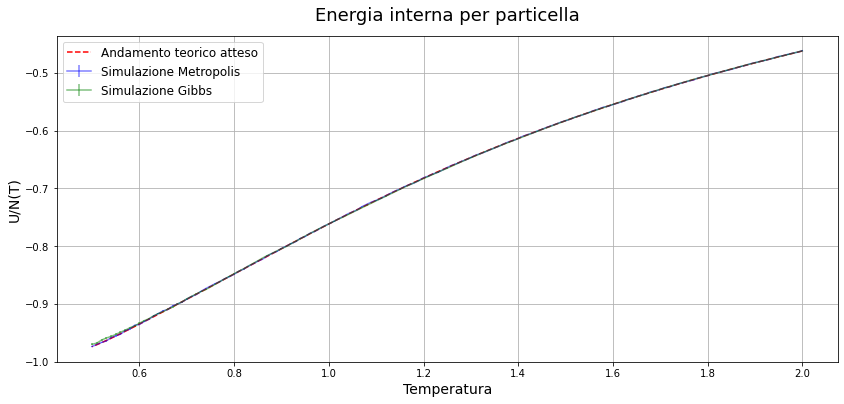

In [8]:
plt.figure(figsize=(14,6))
plt.title('Energia interna per particella', fontsize=18,pad=15)

plt.plot(T, u, label='Andamento teorico atteso',color = 'red', alpha=1, linestyle='--')
plt.xlabel('Temperatura',fontsize=14)
plt.ylabel('U/N(T)',fontsize=14)
plt.grid(True)

plt.errorbar(T, u_m, yerr=u_m_err, color='blue', alpha=0.5, label='Simulazione Metropolis')

plt.errorbar(T, u_g, yerr=u_g_err, color='green', alpha=0.5, label='Simulazione Gibbs')

plt.legend(fontsize=12)
plt.show()

I tre grafici sembrerebbero coincidere, ma a questa scala non si vedono se effettivamente le incertezze statistiche delle misurazioni effettuate con l'algoritmo di Metropolis e di Gibbs siano compatibili con l'andamento teorico dell'osservabile, perciò prima di tutto si può raffigurare un altro grafico in cui si "zoomma" su un particolare set di coordinate (in questo caso $x_1, x_2, y_1, y_2 = 1.2, 1.29, -0.69, -0.65$), dopodichè si possono costruire i grafici delle differenze fra i valori teorici e i valori estratti dagli algoritmi.

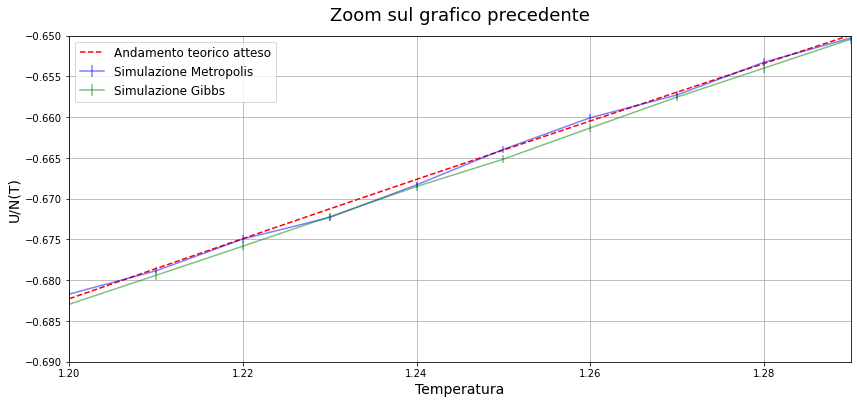

In [9]:
plt.figure(figsize=(14, 6))
plt.title('Zoom sul grafico precedente', fontsize=18, pad=15)

plt.plot(T, u, label='Andamento teorico atteso', color='red', alpha=1, linestyle='--')
plt.xlabel('Temperatura', fontsize=14)
plt.ylabel('U/N(T)', fontsize=14)
plt.grid(True)

plt.errorbar(T, u_m, yerr=u_m_err, color='blue', alpha=0.5, label='Simulazione Metropolis')
plt.errorbar(T, u_g, yerr=u_g_err, color='green', alpha=0.5, label='Simulazione Gibbs')

plt.legend(fontsize=12)

# Imposto i limiti dell'asse x e dell'asse y per lo zoom
x1, x2, y1, y2 = 1.2, 1.29, -0.69, -0.65
plt.axis([x1, x2, y1, y2])

plt.show()

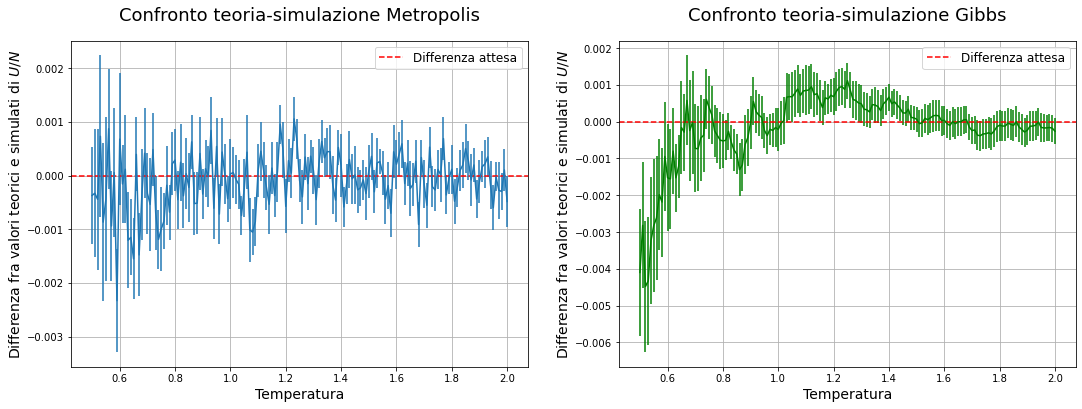

In [10]:
plt.figure(figsize=(18,6))

# Grafico 1
plt.subplot(1,2,1)
plt.title("Confronto teoria-simulazione Metropolis",fontsize=18,pad=20)
plt.errorbar(T, u-u_m, yerr=u_m_err)
plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Differenza fra valori teorici e simulati di $U/N$',fontsize=14)
plt.xlabel("Temperatura",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Grafico 2
plt.subplot(1,2,2)
plt.title("Confronto teoria-simulazione Gibbs",fontsize=18,pad=20)
plt.errorbar(T, u-u_g, yerr=u_g_err, color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Differenza fra valori teorici e simulati di $U/N$',fontsize=14)
plt.xlabel("Temperatura",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

Si osserva dunque che i valori di $U(T)/N$ estratti dalle simulazioni sono compatibili con i valori attesi teorici. Si osserva inoltre che per $T\rightarrow 0$ l'incertezza statistica aumenta: ciò è conseguenza della difficoltà di campionamento a basse temperature.

Si esegue dunque lo stesso procedimento per tutte le altre osservabili.

---

**Calcore specifico per particella**

In [12]:
h=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

data_h_m = np.loadtxt('Ising_observables/output_heat_metro.dat')
data_h_g = np.loadtxt('Ising_observables/output_heat_gibbs.dat')

h_m = data_h_m[:, 2]
h_m_err = data_h_m[:, 3]
h_g = data_h_g[:, 2]
h_g_err = data_h_g[:, 3]

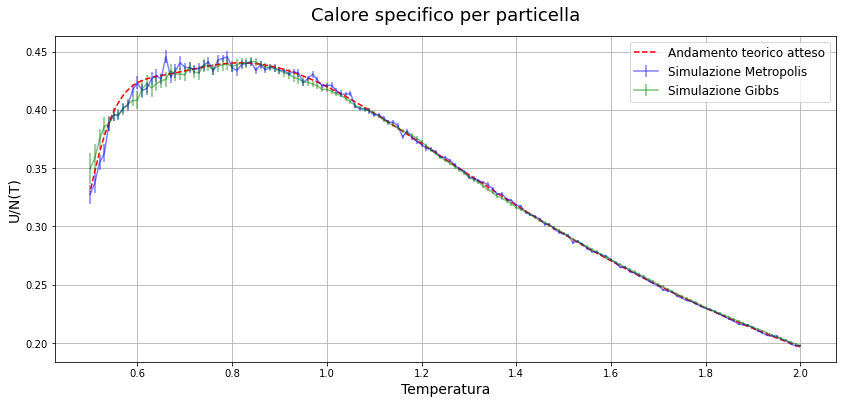

In [13]:
plt.figure(figsize=(14,6))
plt.title('Calore specifico per particella', fontsize=18,pad=15)

plt.plot(T, h, label='Andamento teorico atteso',color = 'red', alpha=1, linestyle='--')
plt.xlabel('Temperatura',fontsize=14)
plt.ylabel('U/N(T)',fontsize=14)
plt.grid(True)

plt.errorbar(T, h_m, yerr=h_m_err, color='blue', alpha=0.5, label='Simulazione Metropolis')

plt.errorbar(T, h_g, yerr=h_g_err, color='green', alpha=0.5, label='Simulazione Gibbs')

plt.legend(fontsize=12)
plt.show()

In questo caso si effettua un zoom su il riquadro dato dalle coordinate $x_1, x_2, y_1, y_2 = 1, 1.2, 0.36, 0.43$.

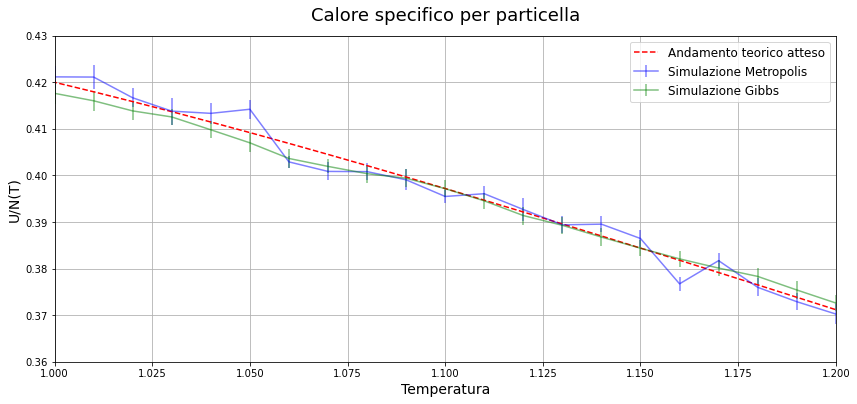

In [14]:
plt.figure(figsize=(14,6))
plt.title('Calore specifico per particella', fontsize=18,pad=15)

plt.plot(T, h, label='Andamento teorico atteso',color = 'red', alpha=1, linestyle='--')
plt.xlabel('Temperatura',fontsize=14)
plt.ylabel('U/N(T)',fontsize=14)
plt.grid(True)

plt.errorbar(T, h_m, yerr=h_m_err, color='blue', alpha=0.5, label='Simulazione Metropolis')

plt.errorbar(T, h_g, yerr=h_g_err, color='green', alpha=0.5, label='Simulazione Gibbs')

plt.legend(fontsize=12)

# Imposto i limiti dell'asse x e dell'asse y per lo zoom
x1, x2, y1, y2 = 1.0, 1.2, 0.36, 0.43
plt.axis([x1, x2, y1, y2])

plt.show()

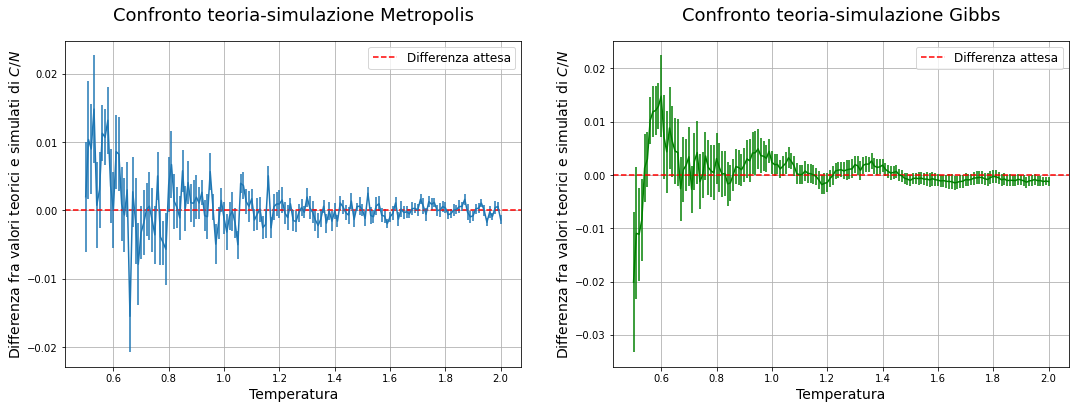

In [15]:
plt.figure(figsize=(18,6))

# Grafico 1
plt.subplot(1,2,1)
plt.title("Confronto teoria-simulazione Metropolis",fontsize=18,pad=20)
plt.errorbar(T, h-h_m, yerr=h_m_err)
plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Differenza fra valori teorici e simulati di $C/N$',fontsize=14)
plt.xlabel("Temperatura",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Grafico 2
plt.subplot(1,2,2)
plt.title("Confronto teoria-simulazione Gibbs",fontsize=18,pad=20)
plt.errorbar(T, h-h_g, yerr=h_g_err, color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Differenza fra valori teorici e simulati di $C/N$',fontsize=14)
plt.xlabel("Temperatura",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

Si osserva come i valori di $C(T)/N$ estratti dalle simulazioni siano compatibili con i valori teorici. Si osserva come il calore specifico abbia un massimo circa in $T=0.8$, per cui fisicamente si può considerare che, a partire da $T=0$, all'aumentare della temperatura la configurazione di spin viene modificata sensibilmente, cambaindo sensibilmente anche la sua temperatura, fino ad arrivare a $T=0.8$, che può essere considerata come una temperatura critica. Per $T>0.8$ si osserva una configurazione disordinata, in cui all'aumentare della temperatura l'energia varia di poco.

---

**Suscettibilità**

In [16]:
x = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

data_x_m = np.loadtxt('Ising_observables/output_chi_metro.dat')
data_x_g = np.loadtxt('Ising_observables/output_chi_gibbs.dat')

x_m = data_x_m[:, 2]
x_m_err = data_x_m[:, 3]
x_g = data_x_g[:, 2]
x_g_err = data_x_g[:, 3]

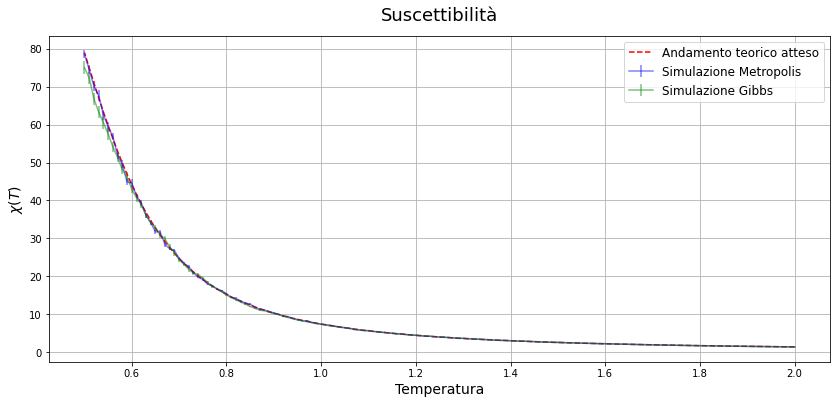

In [17]:
plt.figure(figsize=(14,6))
plt.title('Suscettibilità', fontsize=18,pad=15)

plt.plot(T, x, label='Andamento teorico atteso',color = 'red', alpha=1, linestyle='--')
plt.xlabel('Temperatura',fontsize=14)
plt.ylabel('$\chi(T)$',fontsize=14)
plt.grid(True)

plt.errorbar(T, x_m, yerr=x_m_err, color='blue', alpha=0.5, label='Simulazione Metropolis')

plt.errorbar(T, x_g, yerr=x_g_err, color='green', alpha=0.5, label='Simulazione Gibbs')

plt.legend(fontsize=12)
plt.show()

In questo caso si effettua lo zoom su $x_1, x_2, y_1, y_2 = 0.6, 0.75, 20, 40$.

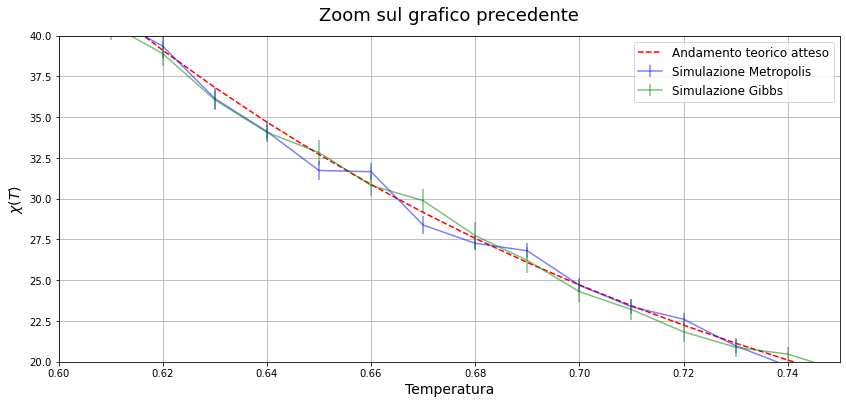

In [18]:
plt.figure(figsize=(14,6))
plt.title('Zoom sul grafico precedente', fontsize=18,pad=15)

plt.plot(T, x, label='Andamento teorico atteso' ,color = 'red', alpha=1, linestyle='--')
plt.xlabel('Temperatura',fontsize=14)
plt.ylabel('$\chi(T)$',fontsize=14)
plt.grid(True)

plt.errorbar(T, x_m, yerr=x_m_err, color='blue', alpha=0.5, label='Simulazione Metropolis')

plt.errorbar(T, x_g, yerr=x_g_err, color='green', alpha=0.5, label='Simulazione Gibbs')

plt.legend(fontsize=12)

# Imposto i limiti dell'asse x e dell'asse y per lo zoom
x1, x2, y1, y2 = 0.6, 0.75, 20, 40
plt.axis([x1, x2, y1, y2])

plt.show()

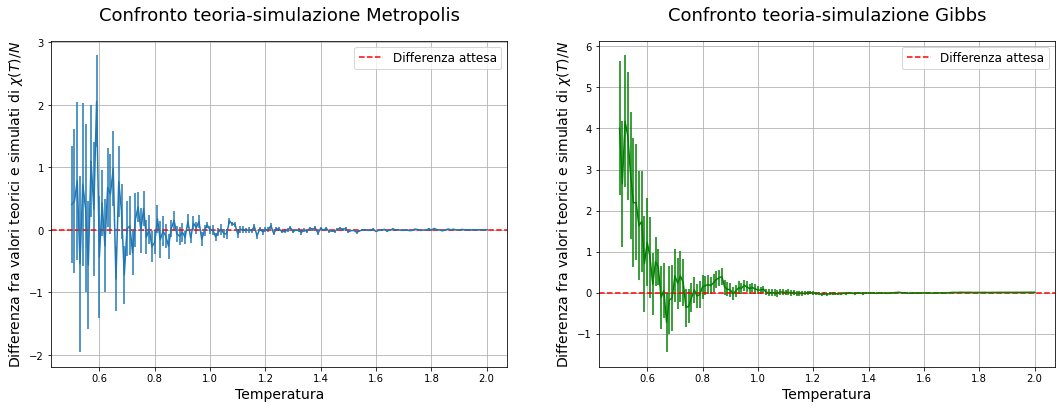

In [19]:
plt.figure(figsize=(18,6))

# Grafico 1
plt.subplot(1,2,1)
plt.title("Confronto teoria-simulazione Metropolis",fontsize=18,pad=20)
plt.errorbar(T, x-x_m, yerr=x_m_err)
plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Differenza fra valori teorici e simulati di $\chi(T)/N$',fontsize=14)
plt.xlabel("Temperatura",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Grafico 2
plt.subplot(1,2,2)
plt.title("Confronto teoria-simulazione Gibbs",fontsize=18,pad=20)
plt.errorbar(T, x-x_g, yerr=x_g_err, color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Differenza fra valori teorici e simulati di $\chi(T)/N$',fontsize=14)
plt.xlabel("Temperatura",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

Si osserva come i valori estratti dalle simulazioni di $\chi(T)$ siano compatibili con i valori teorici. Si osserva inoltre come per $T\rightarrow 0$ la suscettività diventa molto alta poiché ad una perturbazione debole dovuta al campo esterno, il sistema risponde con una variazione di magnetizzazione enorme.

---

**Magnetizzazione**

In [20]:
h=0.02 # Campo esterno
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
m = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

data_m_m = np.loadtxt('Ising_observables/output_mag_metro.dat')
data_m_g = np.loadtxt('Ising_observables/output_mag_gibbs.dat')

m_m = data_m_m[:, 2]
m_m_err = data_m_m[:, 3]
m_g = data_m_g[:, 2]
m_g_err = data_m_g[:, 3]

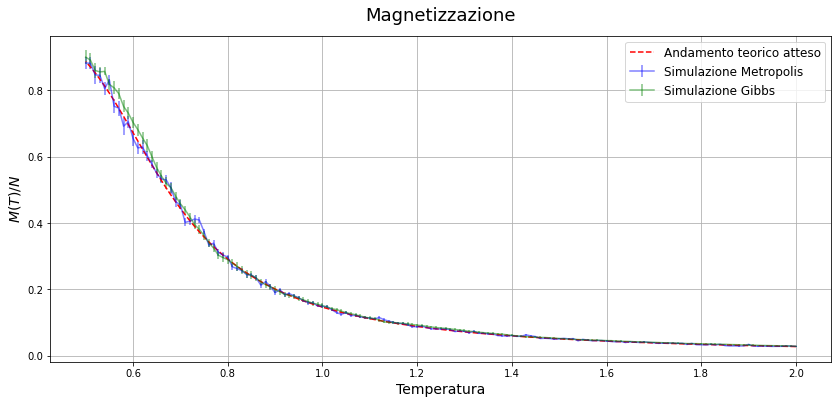

In [21]:
plt.figure(figsize=(14,6))
plt.title('Magnetizzazione', fontsize=18,pad=15)

plt.plot(T, m, label='Andamento teorico atteso',color = 'red', alpha=1, linestyle='--')
plt.xlabel('Temperatura',fontsize=14)
plt.ylabel('$M(T)/N$',fontsize=14)
plt.grid(True)

plt.errorbar(T, m_m, yerr=m_m_err, color='blue', alpha=0.5, label='Simulazione Metropolis')

plt.errorbar(T, m_g, yerr=m_g_err, color='green', alpha=0.5, label='Simulazione Gibbs')

plt.legend(fontsize=12)
plt.show()

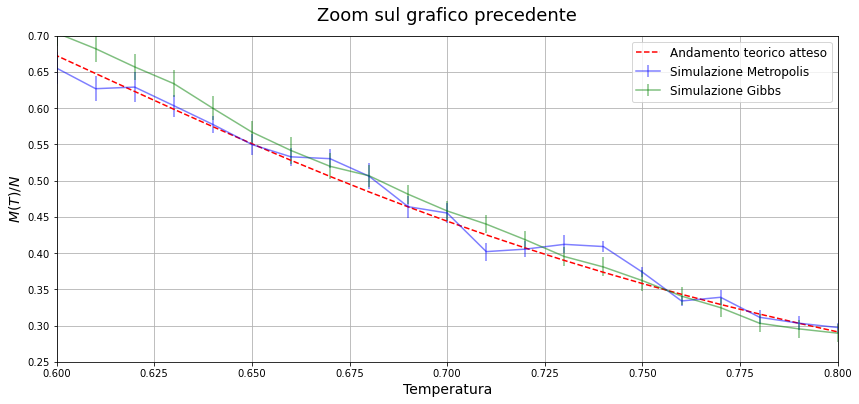

In [22]:
plt.figure(figsize=(14,6))
plt.title('Zoom sul grafico precedente', fontsize=18,pad=15)

plt.plot(T, m, label='Andamento teorico atteso',color = 'red', alpha=1, linestyle='--')
plt.xlabel('Temperatura',fontsize=14)
plt.ylabel('$M(T)/N$',fontsize=14)
plt.grid(True)

plt.errorbar(T, m_m, yerr=m_m_err, color='blue', alpha=0.5, label='Simulazione Metropolis')

plt.errorbar(T, m_g, yerr=m_g_err, color='green', alpha=0.5, label='Simulazione Gibbs')

# Imposto i limiti dell'asse x e dell'asse y per lo zoom
x1, x2, y1, y2 = 0.6, 0.8, 0.25, 0.7
plt.axis([x1, x2, y1, y2])

plt.legend(fontsize=12)
plt.show()

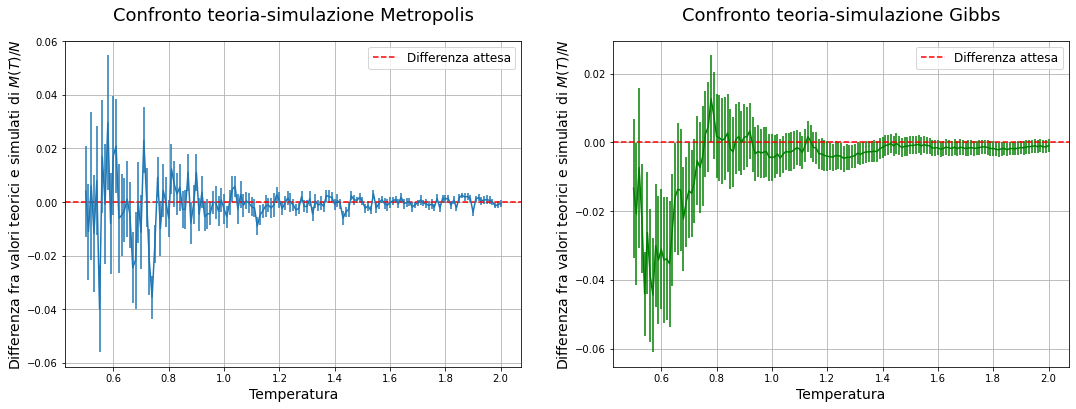

In [23]:
plt.figure(figsize=(18,6))

# Grafico 1
plt.subplot(1,2,1)
plt.title("Confronto teoria-simulazione Metropolis",fontsize=18,pad=20)
plt.errorbar(T, m-m_m, yerr=m_m_err)
plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Differenza fra valori teorici e simulati di $M(T)/N$',fontsize=14)
plt.xlabel("Temperatura",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Grafico 2
plt.subplot(1,2,2)
plt.title("Confronto teoria-simulazione Gibbs",fontsize=18,pad=20)
plt.errorbar(T, m-m_g, yerr=m_g_err, color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Differenza attesa')
plt.ylabel('Differenza fra valori teorici e simulati di $M(T)/N$',fontsize=14)
plt.xlabel("Temperatura",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

Anche in questo ultimo caso si osserva come i valori estratti di $M(T)/N$ dalle simulzioni sono compatibili con i valori teorici. Come ci si poteva aspettare, si osserva come per $T\rightarrow 0$ la magnetizzazione cresce fino a tendere a 1, essendo che il campo esterno è orientato positivamente.